# Clustering Assignment

## 1. Read the data

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [234]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", header=0)
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [235]:
#determining the number of rows and columns
country_df.shape

(167, 10)

In [236]:
# see the basics of the dataframe
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 2.Clean the data


In [237]:
# check for missing values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [238]:
#summary of all the numeric columns in the dataset
country_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

## 3.Visualise data

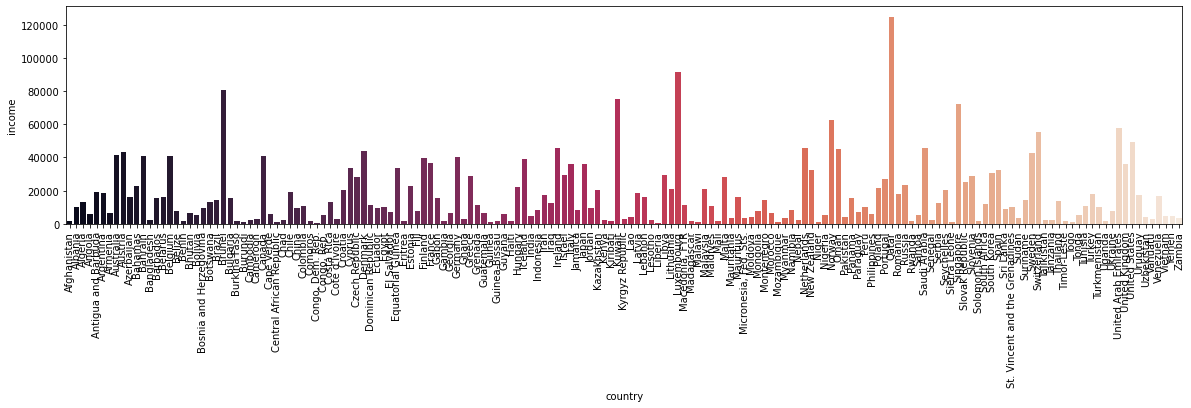

In [239]:
plt.figure(figsize=(20,4))
sns.barplot("country","income",palette="rocket",data=country_df)
plt.xticks(rotation=90)
plt.show()

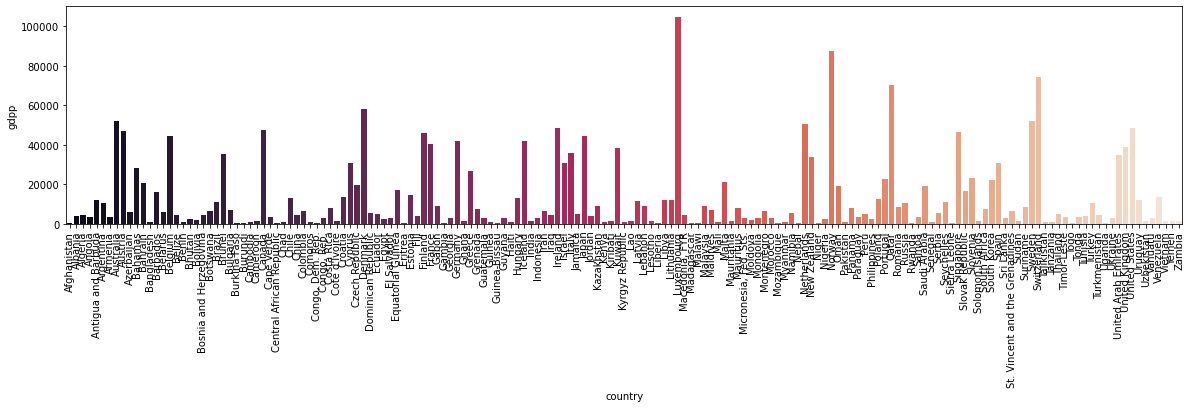

In [240]:
plt.figure(figsize=(20,4))
sns.barplot("country","gdpp",palette="rocket",data=country_df)
plt.xticks(rotation=90)
plt.show()

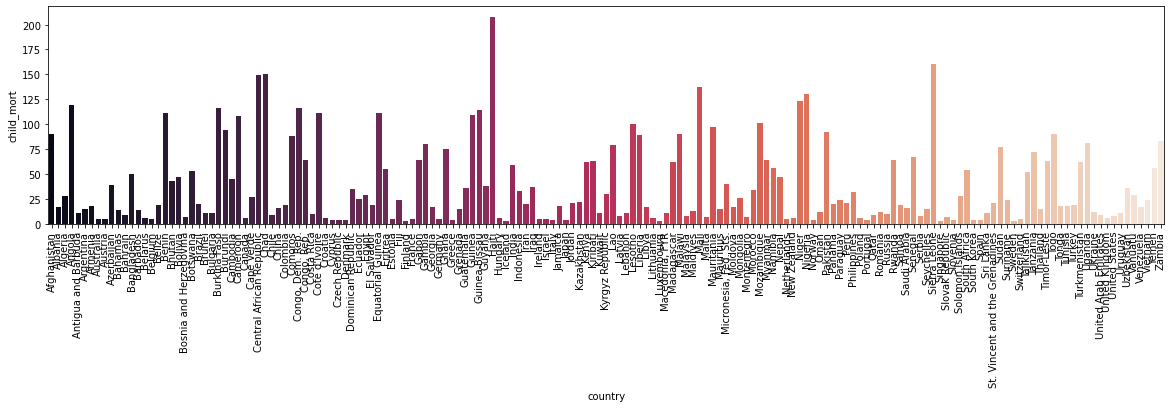

In [241]:
plt.figure(figsize=(20,4))
sns.barplot("country","child_mort",palette="rocket",data=country_df)
plt.xticks(rotation=90)
plt.show()

In [242]:
plt.figure(figsize=(26, 12))
plt.subplot(2,4,1)
sns.boxplot(country_df.exports)
plt.subplot(2,4,2)
sns.boxplot(country_df.imports)
plt.subplot(2,4,3)
sns.boxplot(country_df.inflation)
plt.subplot(2,4,4)
sns.boxplot(country_df.life_expec)
plt.subplot(2,4,5)
sns.boxplot(country_df.gdpp)
plt.subplot(2,4,6)
sns.boxplot(country_df.income)
plt.subplot(2,4,7)
sns.boxplot(country_df.child_mort)
plt.subplot(2,4,8)
sns.boxplot(country_df.health)
plt.show()

Above plots shows that there are outliers and for our analysis we dont need the countries that are performing extremely well. So it would be okay to soft cap them.

<Figure size 288x288 with 0 Axes>

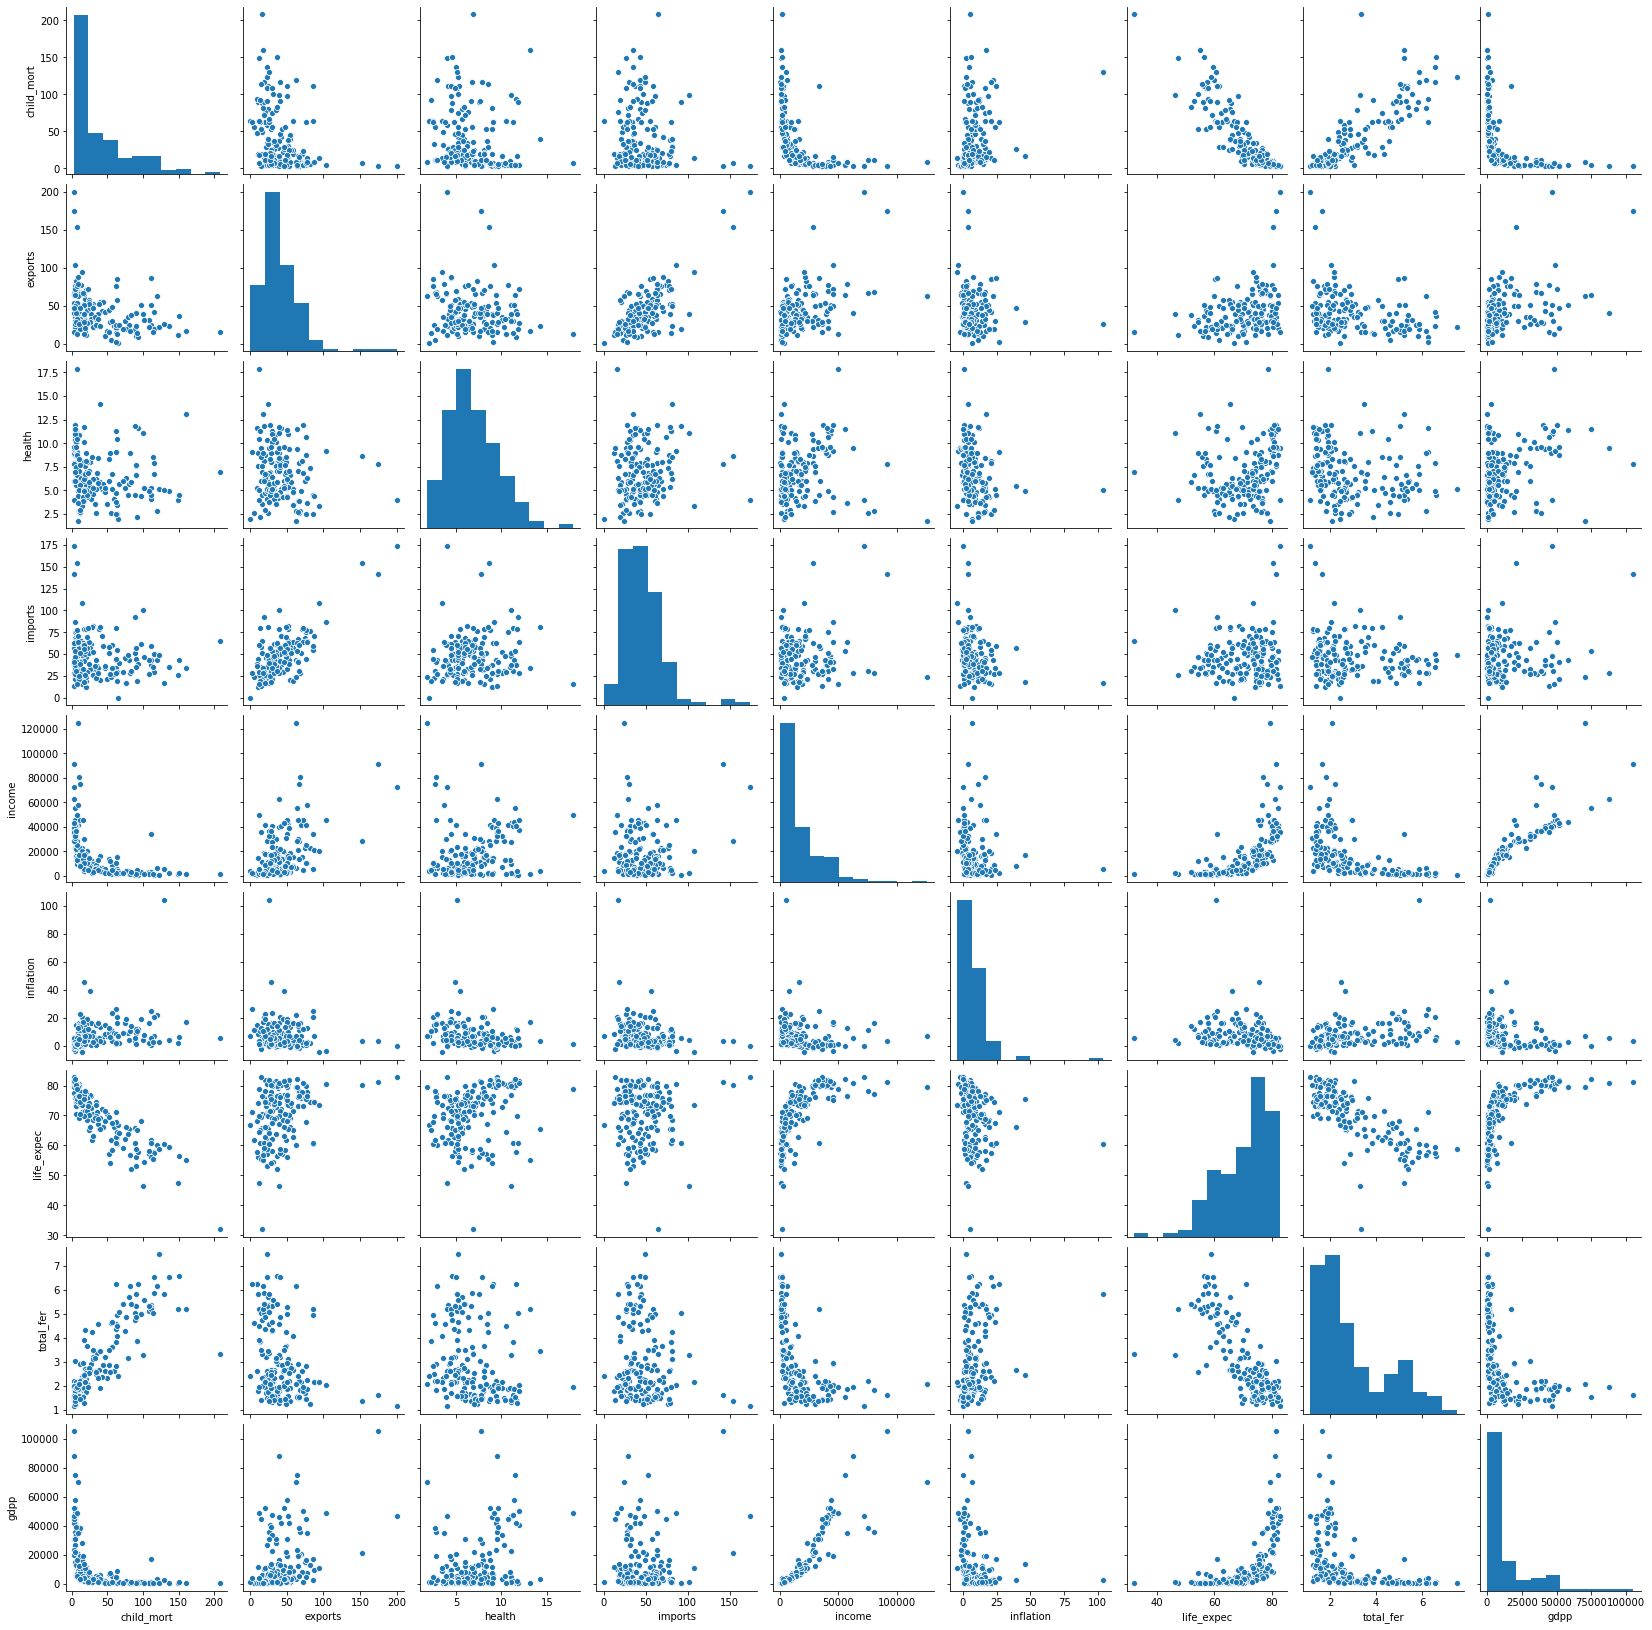

In [243]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(country_df)
plt.show()

Above pairplot shows correlation between features

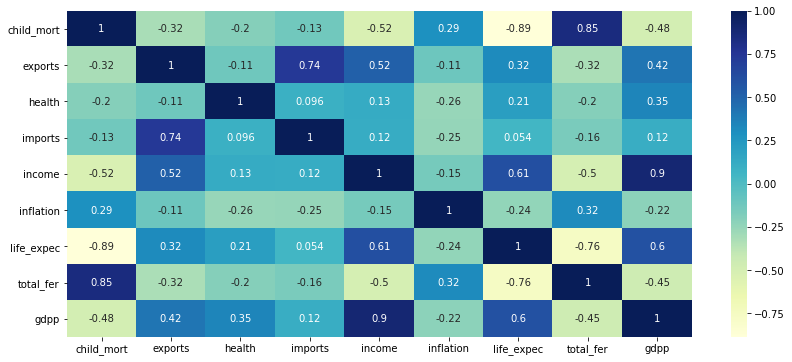

In [244]:
# Let us draw heatmap to understand the correlation better.
plt.figure(figsize = (14,6))  
sns.heatmap(country_df.corr(),annot = True,cmap="YlGnBu")

Above heatmap shows the correlation between features in numericals and it makes sense too as income, gdpp are related and child_mort, total_fer etc.  

#### Outlier Treatment

In [245]:
# Removing the extreme values by soft capping them

q2 =country_df['income'].quantile(0.95)

country_df['income'][country_df['income']>=q2] = q2

q2 =country_df['imports'].quantile(0.95)

country_df['imports'][country_df['imports']>=q2] = q2

q2 =country_df['exports'].quantile(0.95)

country_df['exports'][country_df['exports']>=q2] = q2


q2 =country_df['gdpp'].quantile(0.95)

country_df['gdpp'][country_df['gdpp']>=q2] = q2

In [246]:
country_df.head()


country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2     10.0    7.58     44.9   1610.0   
1              Albania        16.6     28.0    6.55     48.6   9930.0   
2              Algeria        27.3     38.4    4.17     31.4  12900.0   
3               Angola       119.0     62.3    2.85     42.9   5900.0   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Scaling the values

In [247]:
# instantiate
scaler = StandardScaler()
list_features=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
# fit_transform
country_df[list_features] = scaler.fit_transform(country_df[list_features])
country_df.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.440180  0.279088 -0.013380 -0.958349   
1              Albania   -0.538949 -0.548655 -0.097016  0.185228 -0.394006   
2              Algeria   -0.272833 -0.033552 -0.966073 -0.738030 -0.192552   
3               Angola    2.007808  1.150195 -1.448071 -0.120735 -0.667360   
4  Antigua and Barbuda   -0.695634  0.318105 -0.286894  0.738110  0.227992   

   inflation  life_expec  total_fer      gdpp  
0   0.157336   -1.619092   1.902882 -0.757362  
1  -0.312347    0.647866  -0.859973 -0.523321  
2   0.789274    0.670423  -0.038404 -0.498838  
3   1.387054   -1.179234   2.128151 -0.560376  
4  -0.601749    0.704258  -0.541946  0.013312

In [248]:
country_df.set_index('country',inplace=True)

In [249]:
country_df_scaled=country_df

### Modeling

In [250]:
### k-means with some arbitrary k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(country_df)

KMeans(max_iter=50, n_clusters=4)

In [251]:
kmeans.labels_

array([2, 1, 1, 2, 0, 1, 1, 3, 3, 1, 3, 3, 1, 0, 0, 3, 0, 2, 0, 1, 0, 0,
       1, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 3, 0,
       3, 1, 1, 1, 1, 2, 2, 0, 0, 3, 3, 1, 2, 0, 3, 2, 3, 1, 1, 2, 2, 0,
       2, 0, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 0, 1, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1,
       3, 3, 2, 2, 3, 3, 2, 0, 0, 1, 1, 0, 3, 3, 1, 1, 2, 1, 3, 2, 0, 0,
       2, 3, 0, 3, 0, 1, 3, 3, 1, 1, 2, 0, 3, 3, 1, 2, 0, 2, 2, 1, 0, 1,
       0, 2, 0, 3, 3, 3, 1, 1, 0, 1, 0, 2, 2])

## Finding the Optimal Number of Clusters

### SSD

In [252]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [3, 4, 5, 6, 7]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

Elbow curve shows that 3 is a good option

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [253]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.28719432570672726
For n_clusters=3, the silhouette score is 0.2807496870663145
For n_clusters=4, the silhouette score is 0.23727194279790803
For n_clusters=5, the silhouette score is 0.24412753441633744
For n_clusters=6, the silhouette score is 0.2495304101186868
For n_clusters=7, the silhouette score is 0.23784657504969453
For n_clusters=8, the silhouette score is 0.2568987354352888


Although above analysis says 2 is the best but it doesnt makes sense from business perspective. So it's better to go with 3 clusters as it is the next best. From business stand point it serves as undeveloped, developing and developed countries.

In [267]:

# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_df)

KMeans(max_iter=50, n_clusters=3)

In [268]:
# assign the label
country_df['cluster_id'] = kmeans.labels_
country_df.head()

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -1.440180  0.279088 -0.013380 -0.958349   
Albania               -0.538949 -0.548655 -0.097016  0.185228 -0.394006   
Algeria               -0.272833 -0.033552 -0.966073 -0.738030 -0.192552   
Angola                 2.007808  1.150195 -1.448071 -0.120735 -0.667360   
Antigua and Barbuda   -0.695634  0.318105 -0.286894  0.738110  0.227992   

                     inflation  life_expec  total_fer      gdpp  cluster_id  
country                                                                      
Afghanistan           0.157336   -1.619092   1.902882 -0.757362           0  
Albania              -0.312347    0.647866  -0.859973 -0.523321           1  
Algeria               0.789274    0.670423  -0.038404 -0.498838           1  
Angola                1.387054   -1.179234   2.128151 -0.560376           0  
Antigua and Barbuda  -0.601749    0.704258  -0.541946  0.013312           1

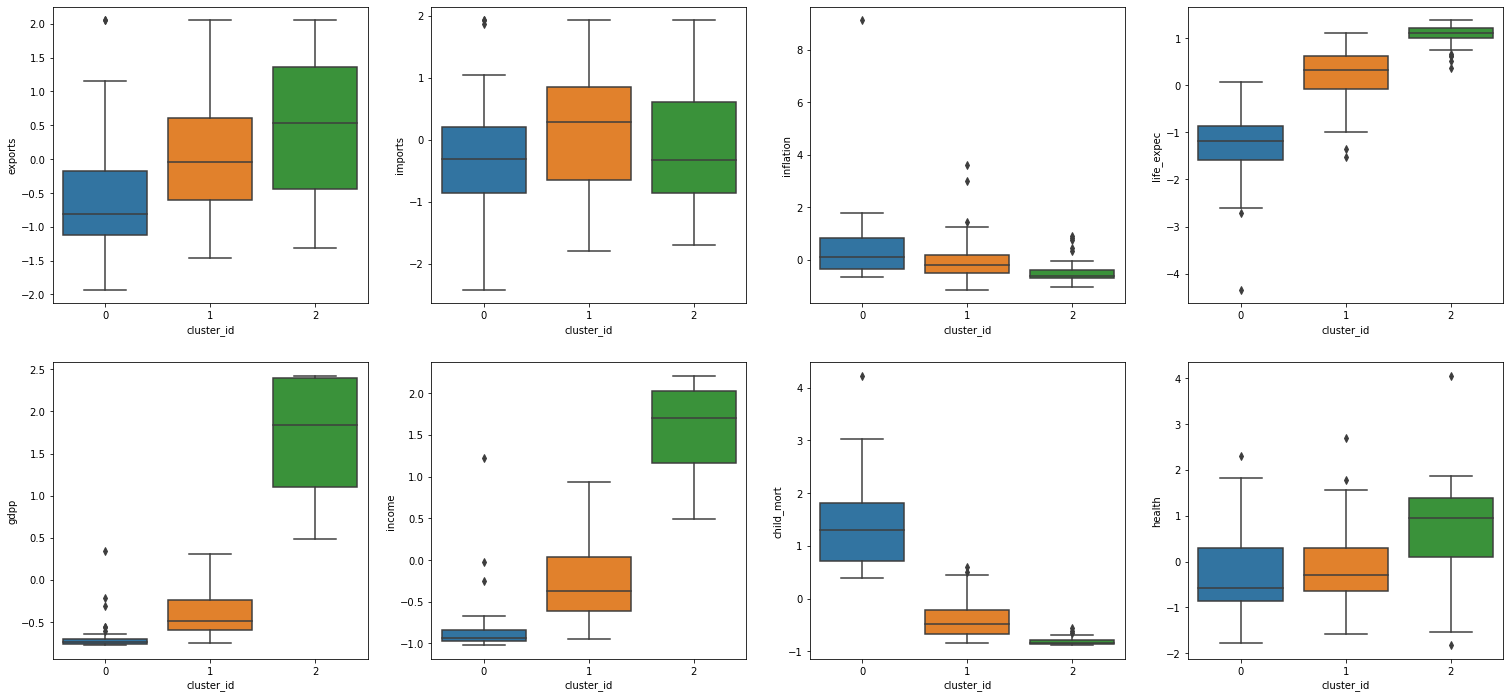

In [269]:
plt.figure(figsize=(26, 12))
plt.subplot(2,4,1)
sns.boxplot(x='cluster_id', y='exports', data=country_df)
plt.subplot(2,4,2)
sns.boxplot(x='cluster_id', y='imports', data=country_df)
plt.subplot(2,4,3)
sns.boxplot(x='cluster_id', y='inflation', data=country_df)
plt.subplot(2,4,4)
sns.boxplot(x='cluster_id', y='life_expec', data=country_df)
plt.subplot(2,4,5)
sns.boxplot(x='cluster_id', y='gdpp', data=country_df)
plt.subplot(2,4,6)
sns.boxplot(x='cluster_id', y='income', data=country_df)
plt.subplot(2,4,7)
sns.boxplot(x='cluster_id', y='child_mort', data=country_df)
plt.subplot(2,4,8)
sns.boxplot(x='cluster_id', y='health', data=country_df)
plt.show()

In [270]:
country_cluster_1=country_df[country_df['cluster_id']==0]


In [271]:
country_cluster_1.sort_values(['gdpp','income','child_mort'], 
                      ascending=[True,True,False]).head(10)

child_mort   exports    health   imports    income  \
country                                                                        
Burundi                     1.376093 -1.493672  1.746991 -0.319343 -1.015733   
Liberia                     1.269149 -0.989465  1.820021  1.931904 -1.020074   
Congo, Dem. Rep.            1.933196  0.100177  0.399588  0.238906 -1.026246   
Niger                       2.107290 -0.835925 -0.604575  0.212067 -1.012341   
Sierra Leone                3.027505 -1.103382  2.294716 -0.571629 -0.984802   
Madagascar                  0.595154 -0.697243 -1.112133 -0.115367 -0.973271   
Mozambique                  1.560136 -0.375303 -0.586317  0.056402 -1.005287   
Central African Republic    2.753928 -1.351028 -1.035452 -1.001051 -1.007322   
Malawi                      1.298994 -0.806207 -0.082410 -0.550158 -0.997690   
Eritrea                     0.421059 -1.698227 -1.517449 -1.172820 -0.971237   

                          inflation  life_expec  total_fer      gdpp  \
country                                                                
Burundi                    0.428709   -1.449916   2.194407 -0.778668   
Liberia                   -0.219360   -1.100286   1.372838 -0.772316   
Congo, Dem. Rep.           1.235237   -1.472473   2.379922 -0.771853   
Niger                     -0.496426   -1.325854   3.009349 -0.770926   
Sierra Leone               0.893648   -1.754433   1.492098 -0.767552   
Madagascar                 0.095661   -1.100286   1.094565 -0.766625   
Mozambique                -0.013458   -1.810825   1.730618 -0.766228   
Central African Republic  -0.547664   -2.600313   1.498724 -0.764442   
Malawi                     0.409732   -1.968722   1.564979 -0.763582   
Eritrea                    0.362289   -0.998780   1.101191 -0.762060   

                          cluster_id  
country                               
Burundi                            0  
Liberia                            0  
Congo, Dem. Rep.                   0  
Niger                              0  
Sierra Leone                       0  
Madagascar                         0  
Mozambique                         0  
Central African Republic           0  
Malawi                             0  
Eritrea                            0

## Hierarchical Clustering

In [273]:
country_df_scaled.head()

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -1.440180  0.279088 -0.013380 -0.958349   
Albania               -0.538949 -0.548655 -0.097016  0.185228 -0.394006   
Algeria               -0.272833 -0.033552 -0.966073 -0.738030 -0.192552   
Angola                 2.007808  1.150195 -1.448071 -0.120735 -0.667360   
Antigua and Barbuda   -0.695634  0.318105 -0.286894  0.738110  0.227992   

                     inflation  life_expec  total_fer      gdpp  cluster_id  
country                                                                      
Afghanistan           0.157336   -1.619092   1.902882 -0.757362           0  
Albania              -0.312347    0.647866  -0.859973 -0.523321           1  
Algeria               0.789274    0.670423  -0.038404 -0.498838           1  
Angola                1.387054   -1.179234   2.128151 -0.560376           0  
Antigua and Barbuda  -0.601749    0.704258  -0.541946  0.013312           1

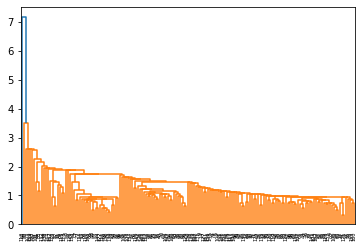

In [284]:
# single linkage
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Single linkage doesnt give us much clarity so let's use complete linkage

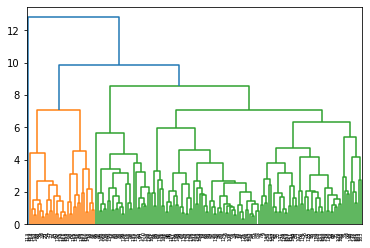

In [285]:
# complete linkage
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [287]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [288]:
# assign cluster labels
country_df_scaled['cluster_id'] = cluster_labels
country_df_scaled.head()

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -1.440180  0.279088 -0.013380 -0.958349   
Albania               -0.538949 -0.548655 -0.097016  0.185228 -0.394006   
Algeria               -0.272833 -0.033552 -0.966073 -0.738030 -0.192552   
Angola                 2.007808  1.150195 -1.448071 -0.120735 -0.667360   
Antigua and Barbuda   -0.695634  0.318105 -0.286894  0.738110  0.227992   

                     inflation  life_expec  total_fer      gdpp  cluster_id  
country                                                                      
Afghanistan           0.157336   -1.619092   1.902882 -0.757362           0  
Albania              -0.312347    0.647866  -0.859973 -0.523321           0  
Algeria               0.789274    0.670423  -0.038404 -0.498838           0  
Angola                1.387054   -1.179234   2.128151 -0.560376           0  
Antigua and Barbuda  -0.601749    0.704258  -0.541946  0.013312           0

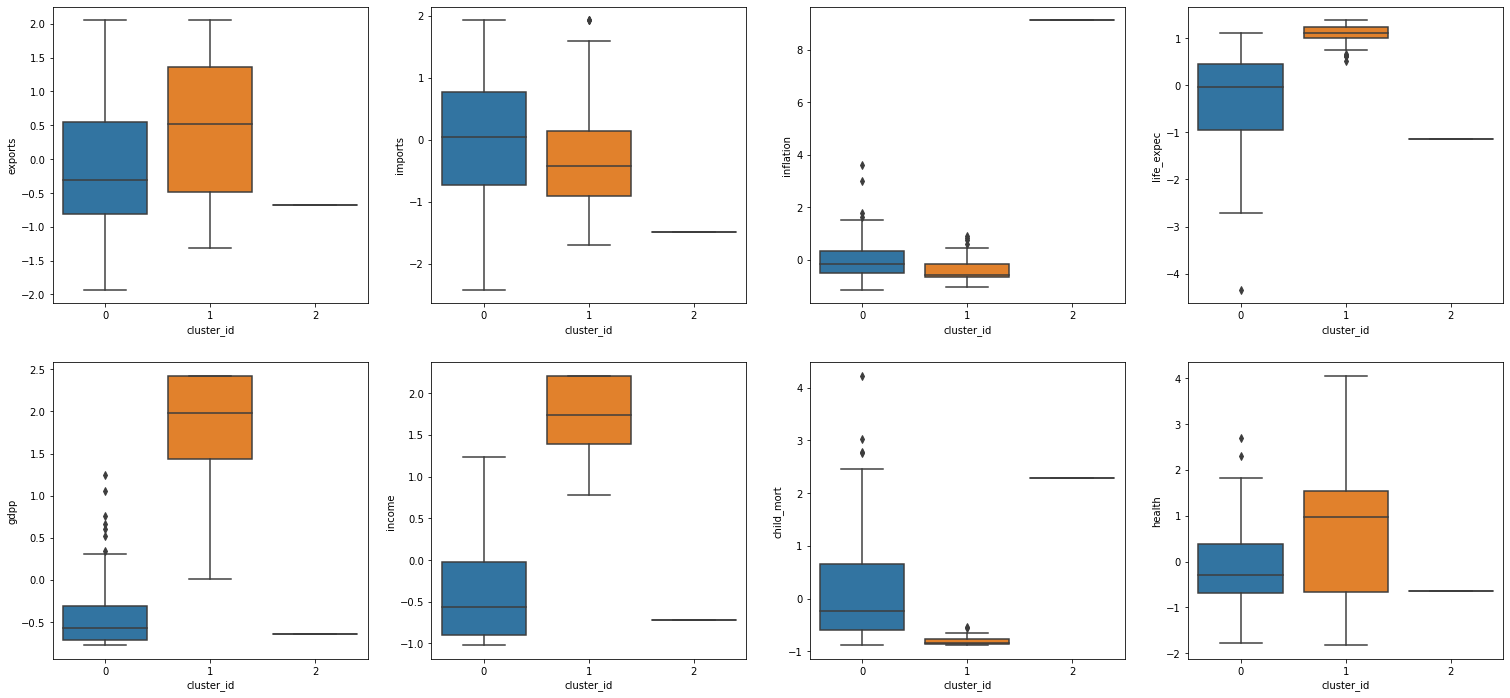

In [289]:
plt.figure(figsize=(26, 12))
plt.subplot(2,4,1)
sns.boxplot(x='cluster_id', y='exports', data=country_df_scaled)
plt.subplot(2,4,2)
sns.boxplot(x='cluster_id', y='imports', data=country_df_scaled)
plt.subplot(2,4,3)
sns.boxplot(x='cluster_id', y='inflation', data=country_df_scaled)
plt.subplot(2,4,4)
sns.boxplot(x='cluster_id', y='life_expec', data=country_df_scaled)
plt.subplot(2,4,5)
sns.boxplot(x='cluster_id', y='gdpp', data=country_df_scaled)
plt.subplot(2,4,6)
sns.boxplot(x='cluster_id', y='income', data=country_df_scaled)
plt.subplot(2,4,7)
sns.boxplot(x='cluster_id', y='child_mort', data=country_df_scaled)
plt.subplot(2,4,8)
sns.boxplot(x='cluster_id', y='health', data=country_df_scaled)
plt.show()

In [290]:
country_cluster=country_df_scaled[country_df_scaled['cluster_id']==0]
country_cluster.sort_values(['gdpp','income','child_mort'], 
                      ascending=[True,True,False]).head(10)

child_mort   exports    health   imports    income  \
country                                                                        
Burundi                     1.376093 -1.493672  1.746991 -0.319343 -1.015733   
Liberia                     1.269149 -0.989465  1.820021  1.931904 -1.020074   
Congo, Dem. Rep.            1.933196  0.100177  0.399588  0.238906 -1.026246   
Niger                       2.107290 -0.835925 -0.604575  0.212067 -1.012341   
Sierra Leone                3.027505 -1.103382  2.294716 -0.571629 -0.984802   
Madagascar                  0.595154 -0.697243 -1.112133 -0.115367 -0.973271   
Mozambique                  1.560136 -0.375303 -0.586317  0.056402 -1.005287   
Central African Republic    2.753928 -1.351028 -1.035452 -1.001051 -1.007322   
Malawi                      1.298994 -0.806207 -0.082410 -0.550158 -0.997690   
Eritrea                     0.421059 -1.698227 -1.517449 -1.172820 -0.971237   

                          inflation  life_expec  total_fer      gdpp  \
country                                                                
Burundi                    0.428709   -1.449916   2.194407 -0.778668   
Liberia                   -0.219360   -1.100286   1.372838 -0.772316   
Congo, Dem. Rep.           1.235237   -1.472473   2.379922 -0.771853   
Niger                     -0.496426   -1.325854   3.009349 -0.770926   
Sierra Leone               0.893648   -1.754433   1.492098 -0.767552   
Madagascar                 0.095661   -1.100286   1.094565 -0.766625   
Mozambique                -0.013458   -1.810825   1.730618 -0.766228   
Central African Republic  -0.547664   -2.600313   1.498724 -0.764442   
Malawi                     0.409732   -1.968722   1.564979 -0.763582   
Eritrea                    0.362289   -0.998780   1.101191 -0.762060   

                          cluster_id  
country                               
Burundi                            0  
Liberia                            0  
Congo, Dem. Rep.                   0  
Niger                              0  
Sierra Leone                       0  
Madagascar                         0  
Mozambique                         0  
Central African Republic           0  
Malawi                             0  
Eritrea                            0

Both K-means and Heirarchical Clustering resulted in same output: Following are the countries which are in direst need of aid by considering socio – economic factor into consideration:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea